In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier

In [8]:
data = pd.read_csv('Instagram data.csv',encoding='latin1')
data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [9]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


`Distribution of impressions received from home`

In [13]:
plt.style.use('fivethirtyeight')

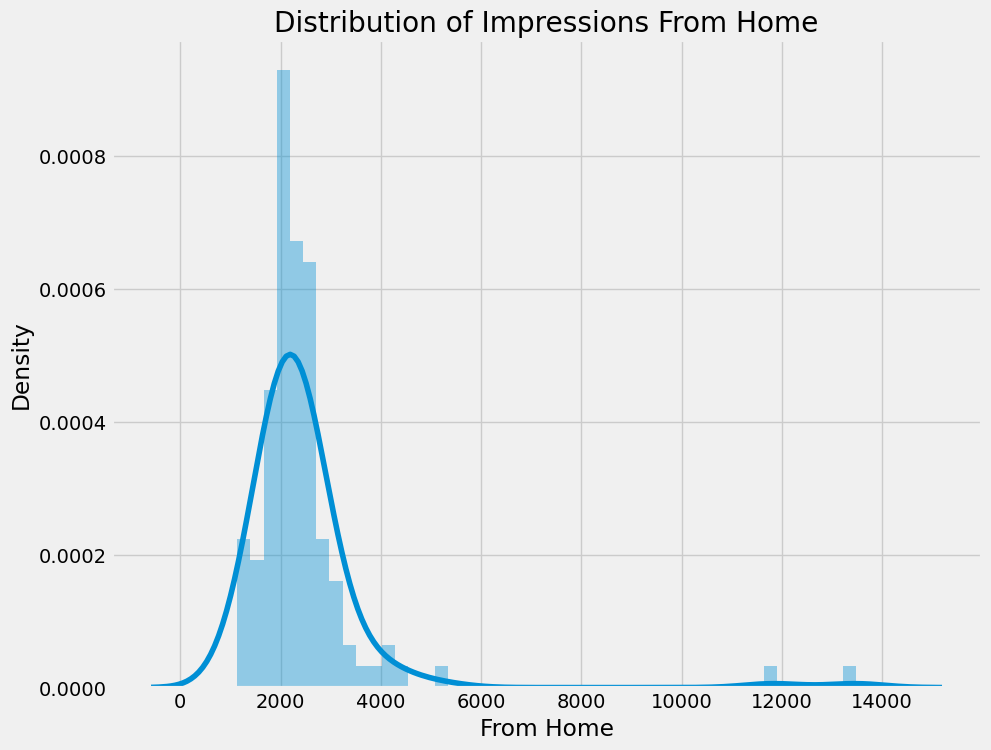

In [24]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

`Distribution of Impressions received from hashtags`

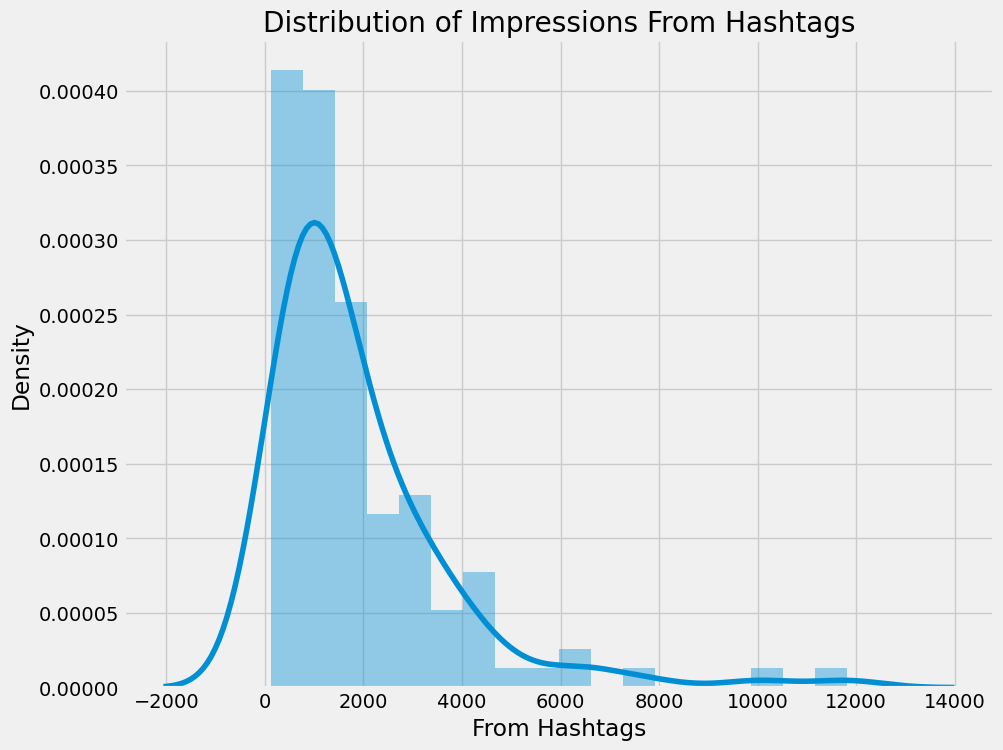

In [22]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

`Distribution of impressions received from the explore`

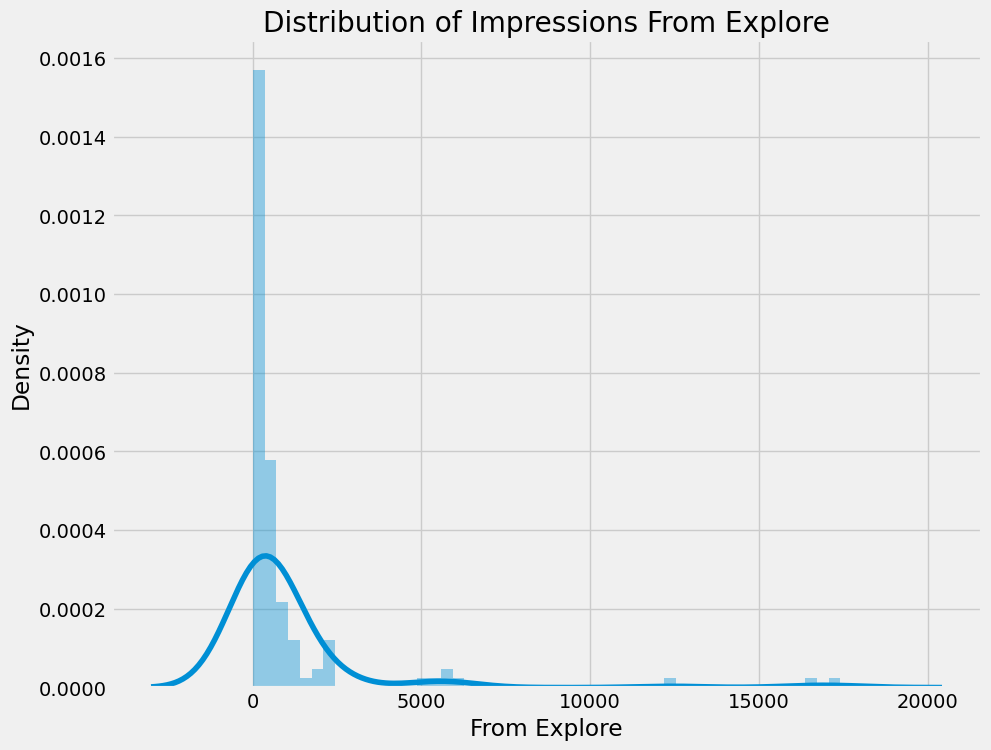

In [26]:
plt.figure(figsize=(10,8))
sns.distplot(data['From Explore'])
plt.title('Distribution of Impressions From Explore')
plt.show()

`Impressions from various sources on Instagram`

In [32]:
home = data['From Home']
hashtags = data['From Hashtags']
explore = data['From Explore']
other = data['From Other']

labels = ['From Home','From Hashtags','From Explore','From Other']
values = [home,hashtags,explore,other]

px.bar(data,y=values)

`Relationship between the number of likes and the number of impressions`

In [33]:
px.scatter(data,x='Impressions',y='Likes',size='Likes',trendline='ols',
          title='Relashionship Between Likes and Impressions')

There is a linear relationship between the number of likes and the reach

`Relationship between the number of comments and the number of impressions`

In [38]:
px.scatter(data,x='Impressions',y='Comments',size='Comments',trendline='ols',
          title='Reletionship Between Comments and Impression')

It looks like the number of comments we get on a post doesn’t affect its reach

`Relationship between the number of shares and the number of impressions`

In [35]:
px.scatter(data,x='Impressions',y='Shares',size='Shares',trendline='ols',
          title='Relashoinship Between Shares and Impressions')

In [36]:
px.scatter(data_frame=data, x="Impressions",y="Saves", size="Saves", trendline="ols", 
           title = "Relationship Between Post Saves and Total Impressions")

In [40]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
conversion_rate

41.00265604249668

`Relationship between the total profile visits and the number of followers gained`

In [41]:
px.scatter(data, x="Profile Visits",y="Follows", size="Follows", trendline="ols", 
           title = "Relationship Between Profile Visits and Followers Gained")

Train a machine learning model to predict the reach of an Instagram post. Let’s split the data into training and test sets before training the model

In [42]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data['Impressions'])

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)

In [45]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [46]:
model = PassiveAggressiveClassifier()
model.fit(xtrain,ytrain)

PassiveAggressiveClassifier()

In [47]:
model.score(xtrain,ytrain)

0.09473684210526316

In [50]:
#Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[253,53,26,8,587,49]])
model.predict(features)

array([4021], dtype=int64)